In [1]:
from alabi.cache_utils import load_model_cache
import os
import sys
sys.path.append(os.path.realpath("../src"))
import tidal
import warnings
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=16)
rc('ytick', labelsize=16)
font = {'family' : 'normal',
        'weight' : 'light'}
rc('font', **font)

import astropy.constants as c
import astropy.units as u

In [6]:
config_id = 110
file = f"../analysis/config/config_{config_id}.yaml"
synth = tidal.SyntheticModel(file, verbose=False, compute_true=True)

File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary


True

In [49]:
def plot_posterior(sm, synth, yy, title=None, scatter_cmap="Blues_r", true_color="darkorange", cb_rng=None, compute_true=True, nlog=False):

    ndim = sm.theta.shape[1]
    
    %matplotlib inline
    warnings.simplefilter("ignore")
    
    fig = corner.corner(sm.theta, c=yy, labels=sm.labels, 
            plot_datapoints=False, plot_density=False, plot_contours=False,
            label_kwargs={"fontsize": 22}, data_kwargs={'alpha':1.0},
            range=sm.bounds, dpi=800)
    fig.set_figwidth(12)
    fig.set_figheight(12)
    fig.subplots_adjust(top=1.1, right=1.05, left=.1)

    axes = np.array(fig.axes).reshape((ndim, ndim))
    if np.all(yy > 0):
        cb_rng = [np.log10(yy.min()), np.log10(yy.max())]
    else:
        cb_rng = [-np.log10(-yy.min()), -np.log10(-yy.max())]

    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]

            im = ax.scatter(sm.theta.T[xi], sm.theta.T[yi], c=yy, s=2, cmap=scatter_cmap, 
                            norm=colors.LogNorm(vmin=10**min(cb_rng), vmax=10**max(cb_rng)),
                            alpha=1.0)
    
    truths = synth.inparams_var.true
    # Loop over the diagonal
    for i in range(ndim):
        ax = axes[i, i]
        fig.delaxes(ax)

    # plot truth values
    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axvline(truths[xi], color=true_color, linestyle="--")
            ax.axhline(truths[yi], color=true_color, linestyle="--")
            ax.plot(truths[xi], truths[yi], true_color, linestyle="--")

    cb = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', anchor=(0,.6), 
                        shrink=.55, pad=-0.3)
    cb.set_label(r'$\log(-\log\mathcal{P})$', fontsize=25, labelpad=-100)
        
    cb_ticks = np.arange(np.ceil(min(cb_rng)), np.ceil(max(cb_rng)))
    cb.set_ticks(10**cb_ticks)
    cb.set_ticklabels(cb_ticks)
    cb.ax.tick_params(labelsize=18)
    if title is not None:
        plt.suptitle(title, fontsize=30)
    plt.show()
    plt.close()
    
    return fig

File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary


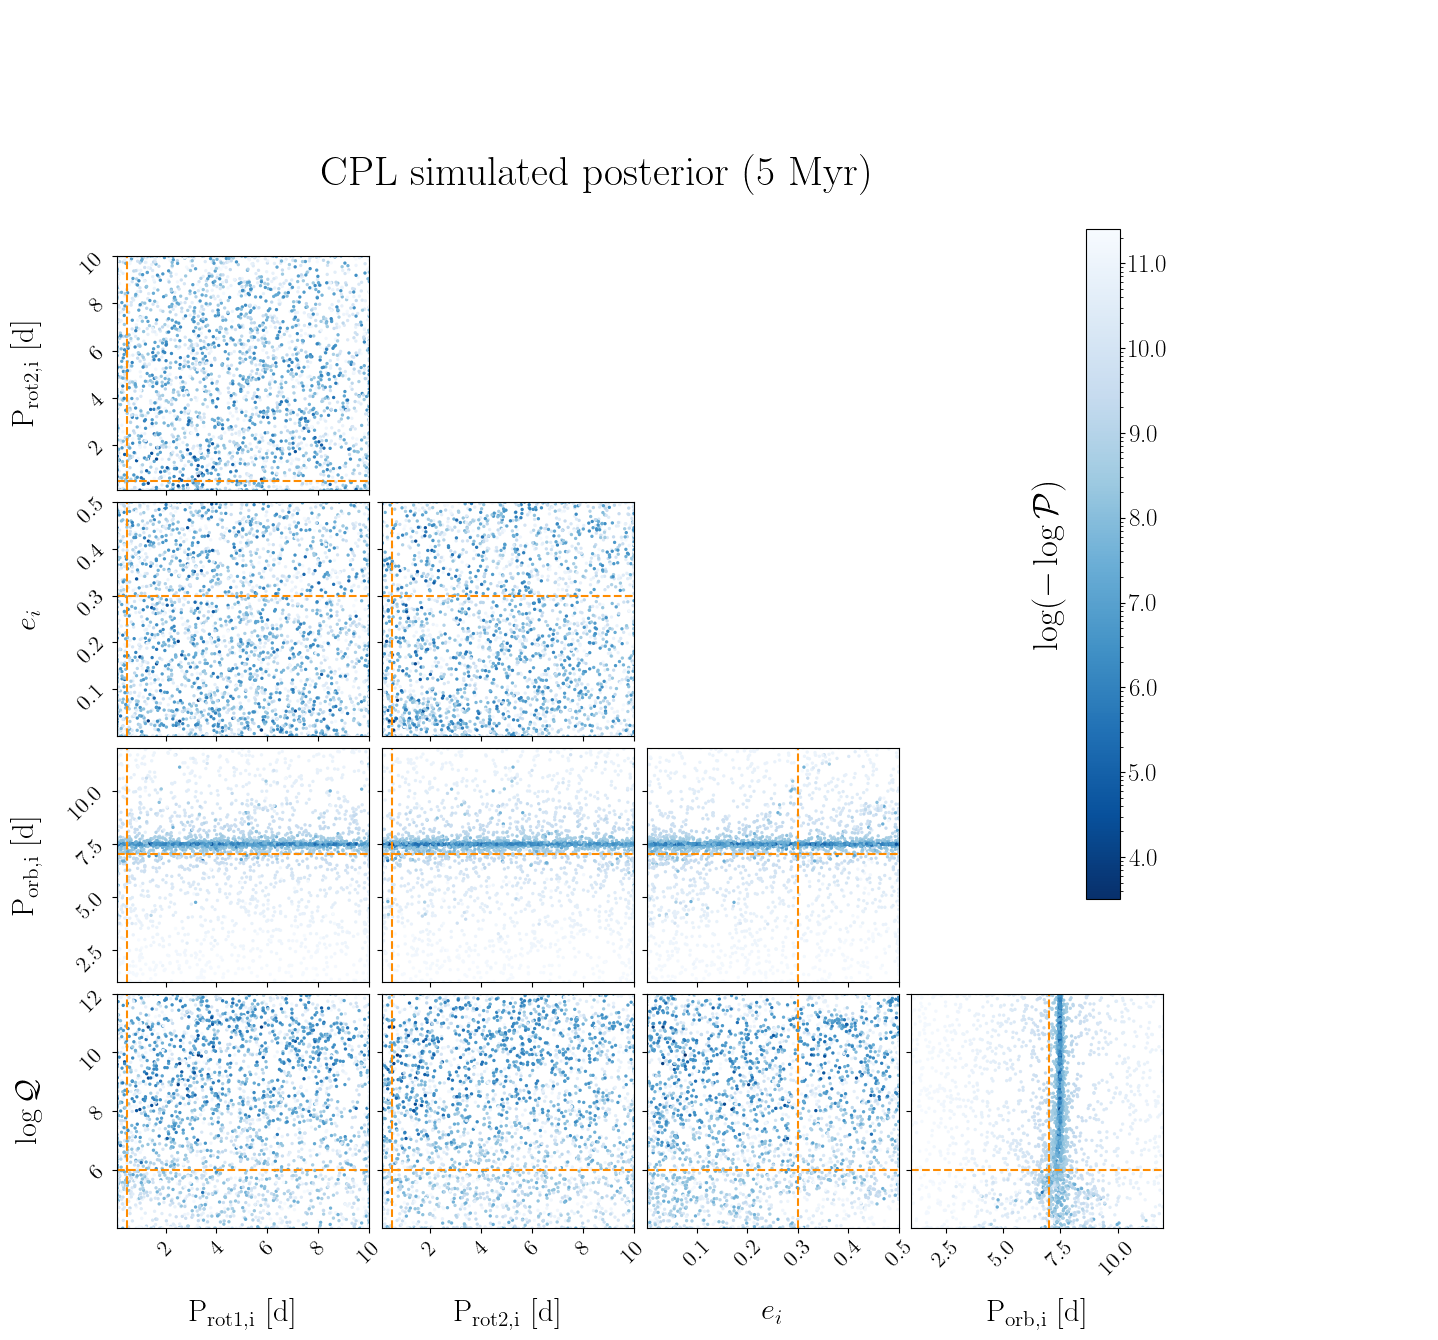

In [41]:
config_id = 110

file = f"../analysis/config/config_{config_id}.yaml"

synth = tidal.SyntheticModel(file, verbose=False, compute_true=True)
sm = load_model_cache(f"../analysis/results_alabi/config_{config_id}/")

fig = plot_posterior(sm, synth, -sm.y, title=f"CPL simulated posterior (5 Myr)")
# fig.savefig(f"../figures/simulated_posterior_cpl_5myr_config_{config_id}.png")

2500 samples


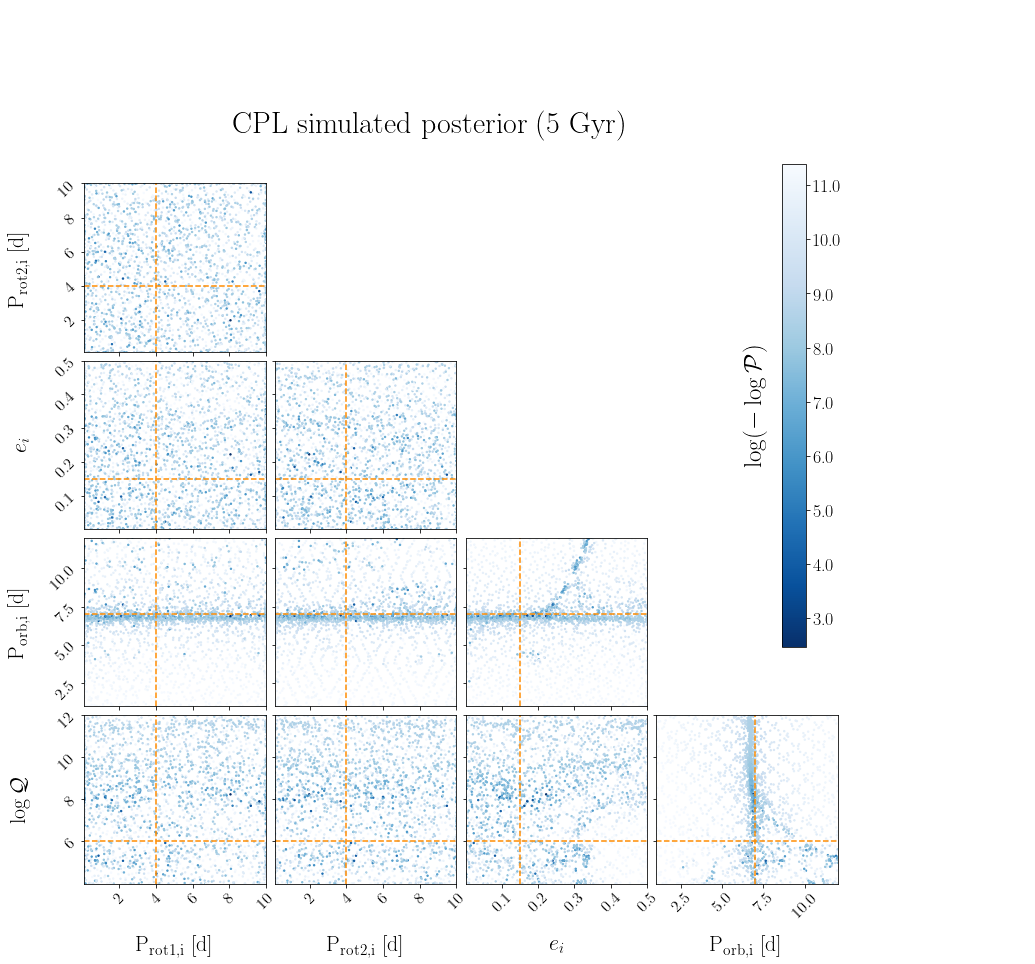

In [8]:
config_id = 120
fig = plot_posterior(config_id, title=f"CPL simulated posterior (5 Gyr)")
fig.savefig(f"../figures/simulated_posterior_cpl_5gyr.png")

3010 samples


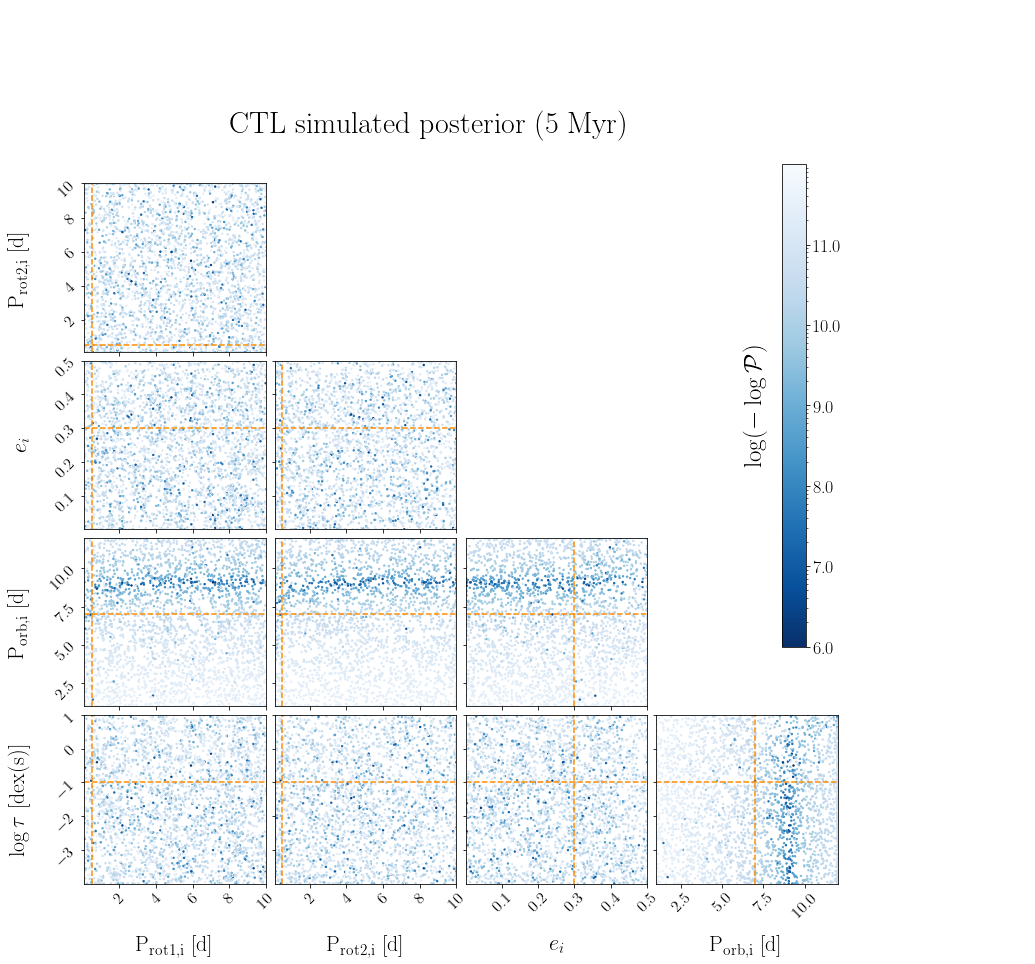

In [9]:
config_id = 112
fig = plot_posterior(config_id, title=f"CTL simulated posterior (5 Myr)", cb_rng=[6,12])
fig.savefig(f"../figures/simulated_posterior_ctl_5myr.png")

2430 samples


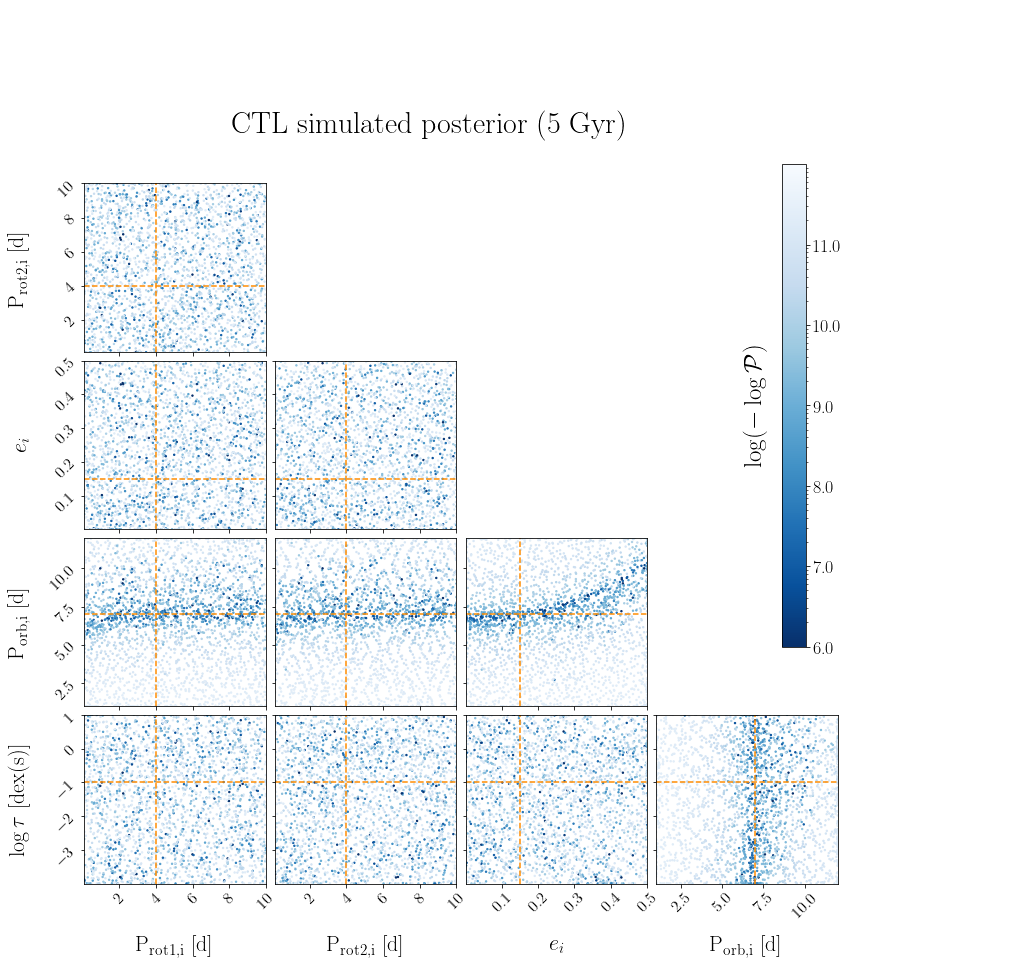

In [10]:
config_id = 121
fig = plot_posterior(config_id, title=f"CTL simulated posterior (5 Gyr)", cb_rng=[6,12])
fig.savefig(f"../figures/simulated_posterior_ctl_5gyr.png")

File: vpl.in
File: vpl.in
File: primary.in
File: primary.in
File: secondary.in
File: secondary.in
Body: primary
Body: secondary
Body: primary
Body: secondary


1950 samples
log(-log(P)) range: 4.5401684380653995 11.606417832182622


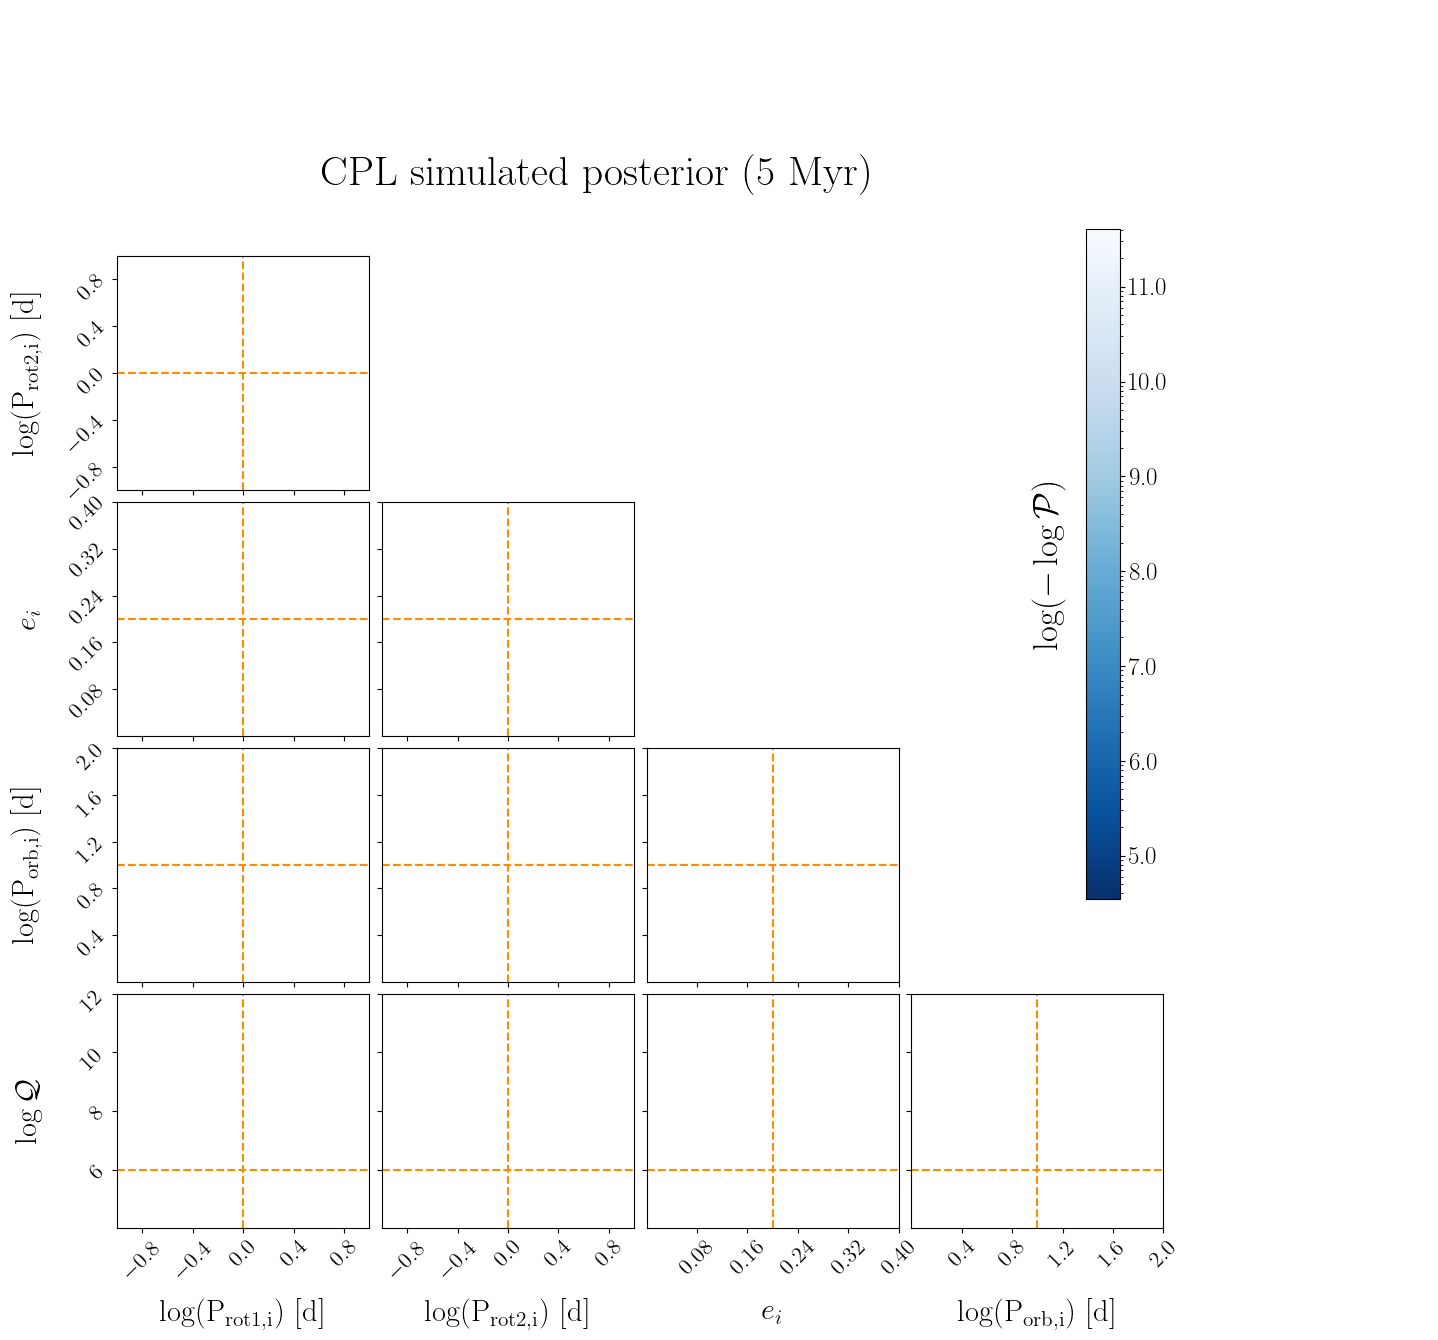

In [50]:
config_id = 128
file = f"../analysis/config/config_{config_id}.yaml"

synth = tidal.SyntheticModel(file, verbose=False, compute_true=True)
sm = load_model_cache(f"../analysis/results_alabi/config_{config_id}/")

print(len(sm.y), "samples")
print("log(-log(P)) range:", sm.y.min(), (sm.y.max()))
    
fig = plot_posterior(sm, synth, -10**(-sm.y), title=f"CPL simulated posterior (5 Myr)")
# fig.savefig(f"../figures/simulated_posterior_cpl_5myr_config_{config_id}.png")

In [28]:
-10**(-sm.y)

array([-5.47210707e-12, -3.30004983e-11, -2.99925010e-10, ...,
       -1.01290142e-09, -1.44345367e-10, -4.45408944e-10])